<!-- Encabezado principal -->
<h1 className="">Proyecto Criptografía</h1>

<!-- Subtítulo más pequeño pero mayor que la letra normal -->
<h3 className="">Elliptic Curve</h3>

<!-- Resumen del documento -->
<p className="">
    En este documento, lo que intento explorar es: Cómo se pueden generar direcciones de criptomonedas utilizando diferentes curvas elípticas que ya están en uso en el mercado de criptomonedas paso a paso para que se comprenda.
    A través de este proceso paso a paso, busco destacar la criptografía en las transacciones seguras y cómo se controla la creación de nuevas unidades de criptomonedas.
</p>

<!-- Contexto -->
<h4 className="">Contexto</h4>
<p className="">
    Las criptomonedas utilizan criptografía avanzada para asegurar las transacciones y controlar la creación de nuevas unidades. Generar direcciones de criptomonedas de manera segura 
    puede ser complejo para usuarios inexpertos. En este documento muestra cómo 5 diferentes curvas, ya usadas en el mercado cripto, son aplicadas paso a paso.
</p>

<!-- Objetivo -->
<h4 className="">Objetivo</h4>
<p className="">
    A través de este documento Jupyter, espero demostrar cómo se puede convertir un punto pseudoaleatorio generado en una curva elíptica en una dirección utilizable en el mundo 
    de las criptofinanzas.
</p>

<!-- Características -->
<h4 className="">Características</h4>
<ul className="">
    <li>Se usaron cinco curvas elípticas.</li>
    <li>Se aplicaron dos criptomonedas: Bitcoin y Ethereum.</li>
</ul>

<span>0. Instalación librerías usadas<span/>

In [1]:
%pip install ecdsa       
%pip install matplotlib 
%pip install base58
%pip install eth-keys
%pip install eth-hash[pycryptodome]
%pip install eth-hash[pysha3]



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<!-- Explicación de las librerías utilizadas -->
<h4 className="">Librerías Utilizadas</h4>

<p className="">
    Para llevar a cabo el proceso de generación de direcciones de criptomonedas utilizando curvas elípticas, utilicé las siguientes librerías que a continuación se nombran, se describe la 
    función de cada una y por qué son adecuadas para este proyecto:
</p>

<ul className="">
    <li>
        <b>ecdsa:</b> Esta librería es fundamental para implementar algoritmos de firma digital basados en curvas elípticas. Permite la generación y verificación de claves públicas y 
        privadas, siendo ideal para este proyecto que requiere la manipulación de curvas elípticas para la generación de direcciones de criptomonedas.
    </li>
    <li>
        <b>matplotlib:</b> Lo utilicé para graficar la curva elíptica y visualizar los puntos generados. Esta librería es adecuada debido a su capacidad para crear gráficos 
        personalizados y de alta calidad, lo que facilita la comprensión visual del proceso criptográfico.
    </li>
    <li>
        <b>base58:</b> Esta librería es necesaria para codificar direcciones de criptomonedas, especialmente Bitcoin, en un formato legible por humanos. Base58 es utilizado en 
        criptomonedas para reducir errores en la copia y escritura de direcciones, siendo esencial para nuestro objetivo de generar direcciones utilizables.
    </li>
    <li>
        <b>eth-keys:</b> Esta librería se utilizó para manejar las claves públicas y privadas en Ethereum. Específicamente, permite convertir claves públicas en direcciones Ethereum.
    </li>
    <li>
        <b>eth-hash[pycryptodome]:</b> Esta librería proporciona funciones de hash, como Keccak, necesarias para calcular las direcciones Ethereum a partir de claves públicas. No es usada directamente pero funciones dentro de la librería eth-keys necesarias acá necesitan de esta y no la trae incorporada directamente
    </li>
    <li>
        <b>eth-hash[pysha3]:</b> Similar a `pycryptodome`, esta variante se utiliza para implementar el algoritmo de hash Keccak. Es adecuada para asegurar la flexibilidad y 
        compatibilidad en entornos donde se requiere hashing criptográfico, proporcionando otra opción interna usable que hace que no caiga en excepciones de generaciones de dirección Ethereum.
    </li>
</ul>

Importación de librerías necesarias

In [2]:
# Importación de librerías usadas
import numpy as np # type: ignore
import ecdsa  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import hashlib
import base58  # type: ignore
from eth_keys import keys   # type: ignore
from eth_utils import to_checksum_address   # type: ignore

<!-- Explicación de las importaciones utilizadas -->
<h4 className="">Importaciones Utilizadas</h4>

<p className="">
    A continuación, se detallan las importaciones que realmente se utilizaron en el código y su relevancia dentro del proyecto de generación de direcciones de criptomonedas utilizando criptografía de curvas elípticas:
</p>

<ul className="">
    <li>
        <b>import numpy as np:</b> NumPy es una librería fundamental para la manipulación de matrices y operaciones matemáticas en Python. En este proyecto, se utilizó para 
        manejar los cálculos relacionados con las claves y puntos generados en las curvas elípticas, proporcionando una base eficiente para operaciones matemáticas complejas.
    </li>
    <li>
        <b>import ecdsa:</b> La librería `ecdsa` es esencial para trabajar con criptografía de curvas elípticas. Permite generar y verificar claves públicas y privadas, 
        y se utilizó para crear claves criptográficas basadas en las curvas elípticas seleccionadas, que luego se convirtieron en direcciones de criptomonedas.
    </li>
    <li>
        <b>import matplotlib.pyplot as plt:</b> `matplotlib.pyplot` es la herramienta estándar para crear gráficos en Python. Fue utilizada para graficar las curvas elípticas y 
        visualizar los puntos generados, lo que ayuda a comprender el proceso criptográfico de manera visual.
    </li>
    <li>
        <b>import hashlib:</b> La librería `hashlib` proporciona funciones de hash criptográficas, como SHA-256, necesarias para generar identificadores únicos y seguros en 
        criptomonedas. En este proyecto, se utilizó para calcular hashes que forman parte del proceso de generación de direcciones de criptomonedas, especialmente en Bitcoin.
    </li>
    <li>
        <b>import base58:</b> Esta librería se utilizó para codificar direcciones de Bitcoin en formato base58. El uso de base58 es estándar en Bitcoin, ya que elimina caracteres 
        que podrían llevar a errores tipográficos, facilitando la transferencia segura de direcciones.
    </li>
    <li>
        <b>from eth_keys import keys:</b> `eth_keys` se utilizó para manejar claves públicas y privadas en Ethereum. Permite convertir claves públicas en direcciones Ethereum, 
        lo cual es crucial para la generación de direcciones válidas en la red Ethereum.
    </li>
    <li>
        <b>from eth_utils import to_checksum_address:</b> `eth_utils` proporciona la función `to_checksum_address`, que se utilizó para convertir direcciones Ethereum en su 
        formato de checksum. Este formato asegura que las direcciones se validen correctamente, reduciendo la posibilidad de errores en transacciones.
    </li>
</ul>

Generación claves

In [3]:
# Definición de curvas
secp256k1 = ecdsa.SECP256k1
secp112r1 = ecdsa.SECP112r1
secp112r2 = ecdsa.SECP112r2
secp128r1 = ecdsa.SECP128r1
secp160r1 = ecdsa.SECP160r1

<h2>secp256k1</h2>
<p>
    <strong>secp256k1</strong> es el tipo de curva elíptica utilizada como curva <a href="https://es.bitcoin.it/wiki/ECDSA">ECDSA</a> en el modelo criptográfico de Bitcoin y viene definida en el documento normativo 
    <em>Standards for Efficient Cryptography (SEC)</em> (Certicom Research, 
    <a href="http://www.secg.org/collateral/sec2_final.pdf">http://www.secg.org/collateral/sec2_final.pdf</a>).
</p>

<p>De acuerdo con la especificación:</p>

<h3>Parámetros del dominio de las curvas elípticas</h3>
<p>
    Los parámetros del dominio de las curvas elípticas sobre <em>F<sub>p</sub></em> asociados con una curva de Koblitz secp256k1 vienen especificados por el sexteto 
    <em>T = (p, a, b, G, n, h)</em>, en donde el campo finito <em>F<sub>p</sub></em> está definido por:
</p>

<ul>
    <li><strong>p</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F</li>
    <li>= 2<sup>256</sup> - 2<sup>32</sup> - 2<sup>9</sup> - 2<sup>8</sup> - 2<sup>7</sup> - 2<sup>6</sup> - 2<sup>4</sup> - 1</li>
</ul>

<h3>Curva E</h3>
<p>
    La curva <em>E</em>: <em>y<sup>2</sup> = x<sup>3</sup> + ax + b</em> sobre <em>F<sub>p</sub></em> está definida por:
</p>

<ul>
    <li><strong>a</strong> = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000</li>
    <li><strong>b</strong> = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007</li>
</ul>

<h3>Punto base G</h3>
<p>
    El punto base <strong>G</strong> en forma comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 02 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798</li>
</ul>

<p>
    Y en forma no comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 04 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798 483ADA77 26A3C465 5DA4FBFC 0E1108A8 FD17B448 A6855419 9C47D08F FB10D4B8</li>
</ul>

<h3>Orden y cofactor</h3>
<p>
    Finalmente, el orden <strong>n</strong> de <strong>G</strong> y el cofactor son:
</p>

<ul>
    <li><strong>n</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE BAAEDCE6 AF48A03B BFD25E8C D0364141</li>
    <li><strong>h</strong> = 01</li>
</ul>

<hr>
<p>
    <em>Este contenido ha sido extraído de: 
    <a href="https://es.bitcoin.it/wiki/Secp256k1">https://es.bitcoin.it/wiki/Secp256k1</a></em>
</p>

<h2>secp112r1</h2>
<p>
    <strong>secp112r1</strong> es una curva elíptica recomendada por el documento normativo 
    <em>Standards for Efficient Cryptography (SEC)</em> (Certicom Research, 
    <a href="http://www.secg.org/collateral/sec2_final.pdf">http://www.secg.org/collateral/sec2_final.pdf</a>).
    Es una de las curvas más pequeñas en cuanto a tamaño de clave, lo que la hace adecuada para aplicaciones con restricciones en el uso de memoria y potencia de procesamiento.
</p>

<p>De acuerdo con la especificación:</p>

<h3>Parámetros del dominio de las curvas elípticas</h3>
<p>
    Los parámetros del dominio de las curvas elípticas sobre <em>F<sub>p</sub></em> asociados con la curva secp112r1 vienen especificados por el sexteto 
    <em>T = (p, a, b, G, n, h)</em>, en donde el campo finito <em>F<sub>p</sub></em> está definido por:
</p>

<ul>
    <li><strong>p</strong> = DB7C 2ABF 62E3 5E66 80D0 AAD4 987E A0E0 30</li>
    <li>= 2<sup>112</sup> - 3</li>
</ul>

<h3>Curva E</h3>
<p>
    La curva <em>E</em>: <em>y<sup>2</sup> = x<sup>3</sup> + ax + b</em> sobre <em>F<sub>p</sub></em> está definida por:
</p>

<ul>
    <li><strong>a</strong> = DB7C 2ABF 62E3 5E66 80D0 AAD4 987E A0E0 2E</li>
    <li><strong>b</strong> = 659E F8BA 0439 16EE DE89 1170 289B D1E4 16</li>
</ul>

<h3>Punto base G</h3>
<p>
    El punto base <strong>G</strong> en forma comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 04 0948 7239 995A 5EE7 6B55 F9C2 F098</li>
</ul>

<h3>Orden y cofactor</h3>
<p>
    Finalmente, el orden <strong>n</strong> de <strong>G</strong> y el cofactor son:
</p>

<ul>
    <li><strong>n</strong> = DB7C 2ABF 62E3 5E76 28DF AC65 61C5</li>
    <li><strong>h</strong> = 01</li>
</ul>

<hr>
<p>
    <em>Información basada en el documento SEC 2: Recommended Elliptic Curve Domain Parameters</em>
</p>

<h2>secp112r2</h2>
<p>
    <strong>secp112r2</strong> es una curva elíptica recomendada por el documento normativo 
    <em>Standards for Efficient Cryptography (SEC)</em> (Certicom Research, 
    <a href="http://www.secg.org/collateral/sec2_final.pdf">http://www.secg.org/collateral/sec2_final.pdf</a>).
    Esta curva es similar a secp112r1 pero con un conjunto diferente de parámetros que ofrecen 
    propiedades distintas para aplicaciones criptográficas.
</p>

<p>De acuerdo con la especificación:</p>

<h3>Parámetros del dominio de las curvas elípticas</h3>
<p>
    Los parámetros del dominio de las curvas elípticas sobre <em>F<sub>p</sub></em> asociados con la curva secp112r2 vienen especificados por el sexteto 
    <em>T = (p, a, b, G, n, h)</em>, en donde el campo finito <em>F<sub>p</sub></em> está definido por:
</p>

<ul>
    <li><strong>p</strong> = DB7C 2ABF 62E3 5E76 28DF AC65 61C5 02A8</li>
    <li>= 2<sup>112</sup> - 2<sup>32</sup> - 2<sup>12</sup> - 2<sup>8</sup> - 2<sup>7</sup> - 2<sup>6</sup> - 2<sup>4</sup> - 1</li>
</ul>

<h3>Curva E</h3>
<p>
    La curva <em>E</em>: <em>y<sup>2</sup> = x<sup>3</sup> + ax + b</em> sobre <em>F<sub>p</sub></em> está definida por:
</p>

<ul>
    <li><strong>a</strong> = 62E3 5E66 80D0 AAD4 987E A0E0 30 02A8</li>
    <li><strong>b</strong> = 659E F8BA 0439 16EE DE89 1170 289B D1E4 16</li>
</ul>

<h3>Punto base G</h3>
<p>
    El punto base <strong>G</strong> en forma comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 04 0948 7239 995A 5EE7 6B55 F9C2 F098</li>
</ul>

<h3>Orden y cofactor</h3>
<p>
    Finalmente, el orden <strong>n</strong> de <strong>G</strong> y el cofactor son:
</p>

<ul>
    <li><strong>n</strong> = DB7C 2ABF 62E3 5E76 28DF AC65 61C5</li>
    <li><strong>h</strong> = 01</li>
</ul>

<hr>
<p>
    <em>Información basada en el documento SEC 2: Recommended Elliptic Curve Domain Parameters</em>
</p>

<h2>secp128r1</h2>
<p>
    <strong>secp128r1</strong>, también conocida como <em>prime192v1</em>, es una curva elíptica recomendada por el documento normativo 
    <em>Standards for Efficient Cryptography (SEC)</em> (Certicom Research, 
    <a href="http://www.secg.org/collateral/sec2_final.pdf">http://www.secg.org/collateral/sec2_final.pdf</a>).
    Esta curva es popular en aplicaciones criptográficas debido a su tamaño intermedio y a su seguridad.
</p>

<p>De acuerdo con la especificación:</p>

<h3>Parámetros del dominio de las curvas elípticas</h3>
<p>
    Los parámetros del dominio de las curvas elípticas sobre <em>F<sub>p</sub></em> asociados con la curva secp128r1 vienen especificados por el sexteto 
    <em>T = (p, a, b, G, n, h)</em>, en donde el campo finito <em>F<sub>p</sub></em> está definido por:
</p>

<ul>
    <li><strong>p</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF</li>
    <li>= 2<sup>128</sup> - 2<sup>32</sup> - 2<sup>16</sup> - 2<sup>8</sup> - 1</li>
</ul>

<h3>Curva E</h3>
<p>
    La curva <em>E</em>: <em>y<sup>2</sup> = x<sup>3</sup> + ax + b</em> sobre <em>F<sub>p</sub></em> está definida por:
</p>

<ul>
    <li><strong>a</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFC</li>
    <li><strong>b</strong> = 1C97 BEFC 9B1E 8E1E 1C9A 1F84 7E43 4FE1</li>
</ul>

<h3>Punto base G</h3>
<p>
    El punto base <strong>G</strong> en forma comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 04 6B 17 98 4D 16 9F 9D 38 6D 23 4B 9F 0A 51 7B 29 56 5B 30</li>
</ul>

<h3>Orden y cofactor</h3>
<p>
    Finalmente, el orden <strong>n</strong> de <strong>G</strong> y el cofactor son:
</p>

<ul>
    <li><strong>n</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF 00000000 00000000 00000000 00000001</li>
    <li><strong>h</strong> = 01</li>
</ul>

<hr>
<p>
    <em>Información basada en el documento SEC 2: Recommended Elliptic Curve Domain Parameters</em>
</p>

<h2>secp160r1</h2>
<p>
    <strong>secp160r1</strong>, también conocida como <em>prime160v1</em>, es una curva elíptica recomendada por el documento normativo 
    <em>Standards for Efficient Cryptography (SEC)</em> (Certicom Research, 
    <a href="http://www.secg.org/collateral/sec2_final.pdf">http://www.secg.org/collateral/sec2_final.pdf</a>).
    Es una de las curvas más comunes utilizadas en aplicaciones criptográficas debido a su equilibrio entre seguridad y rendimiento.
</p>

<p>De acuerdo con la especificación:</p>

<h3>Parámetros del dominio de las curvas elípticas</h3>
<p>
    Los parámetros del dominio de las curvas elípticas sobre <em>F<sub>p</sub></em> asociados con la curva secp160r1 vienen especificados por el sexteto 
    <em>T = (p, a, b, G, n, h)</em>, en donde el campo finito <em>F<sub>p</sub></em> está definido por:
</p>

<ul>
    <li><strong>p</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF</li>
    <li>= 2<sup>160</sup> - 2<sup>32</sup> - 2<sup>8</sup> - 2<sup>7</sup> - 2<sup>6</sup> - 2<sup>4</sup> - 2<sup>3</sup> - 2<sup>2</sup> - 2<sup>1</sup> - 1</li>
</ul>

<h3>Curva E</h3>
<p>
    La curva <em>E</em>: <em>y<sup>2</sup> = x<sup>3</sup> + ax + b</em> sobre <em>F<sub>p</sub></em> está definida por:
</p>

<ul>
    <li><strong>a</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFC</li>
    <li><strong>b</strong> = 1C97 BEFC 9B1E 8E1E 1C9A 1F84 7E43 4FE1</li>
</ul>

<h3>Punto base G</h3>
<p>
    El punto base <strong>G</strong> en forma comprimida es:
</p>
<ul>
    <li><strong>G</strong> = 04 6B 17 98 4D 16 9F 9D 38 6D 23 4B 9F 0A 51 7B 29 56 5B 30</li>
</ul>

<h3>Orden y cofactor</h3>
<p>
    Finalmente, el orden <strong>n</strong> de <strong>G</strong> y el cofactor son:
</p>

<ul>
    <li><strong>n</strong> = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF 00000000 00000000 00000000 00000001</li>
    <li><strong>h</strong> = 01</li>
</ul>

<hr>
<p>
    <em>Información basada en el documento SEC 2: Recommended Elliptic Curve Domain Parameters</em>
</p>

<h1>Generación de las curvas<h1/>

In [4]:
# Generación claves para la curva secp256k1
secp256k1_private_k = ecdsa.SigningKey.generate(curve=secp256k1)
secp256k1_public_k = secp256k1_private_k.get_verifying_key()

print("secp256k1:")
print(f"Private Key: {secp256k1_private_k.to_string().hex()}")
print(f"Public Key: {secp256k1_public_k.to_string().hex()}")

secp256k1:
Private Key: 08d6c99ab24bbd80b23e1413188170a5368ee0674fdfa0b4cad2a86408bc7367
Public Key: 56c8a07045a8a4993caa3f12e7376e44d74041671cd14655a256c14e542af3fa9514d07bb8ae552a15581bc881f6a804aefb59ca8c95d7fad7bdd07ee24b5746


In [5]:
# Generación claves para la curva secp112r1
secp112r1 = ecdsa.SECP112r1
secp112r1_private_k = ecdsa.SigningKey.generate(curve=secp112r1)
secp112r1_public_k = secp112r1_private_k.get_verifying_key()

print("secp112r1:")
print(f"Private Key: {secp112r1_private_k.to_string().hex()}")
print(f"Public Key: {secp112r1_public_k.to_string().hex()}")

secp112r1:
Private Key: 56400143021e80958432b4238e6a
Public Key: 2dad09a1adfde3320411832eecc20febfdcb5b012e6991413c0e1c8b


In [6]:
# Generación claves para la curva secp112r2
secp112r2 = ecdsa.SECP112r2
secp112r2_private_k = ecdsa.SigningKey.generate(curve=secp112r2)
secp112r2_public_k = secp112r2_private_k.get_verifying_key()

print("secp112r2:")
print(f"Private Key: {secp112r2_private_k.to_string().hex()}")
print(f"Public Key: {secp112r2_public_k.to_string().hex()}")

secp112r2:
Private Key: 193e91064fe50eb012fa6a6c119b
Public Key: cc4848feb659684fb2784b61c90bcfe5a66adefaa60e543d79742e71


In [7]:
# Generación claves para la curva secp128r1
secp128r1 = ecdsa.SECP128r1
secp128r1_private_k = ecdsa.SigningKey.generate(curve=secp128r1)
secp128r1_public_k = secp128r1_private_k.get_verifying_key()

print("secp128r1:")
print(f"Private Key: {secp128r1_private_k.to_string().hex()}")
print(f"Public Key: {secp128r1_public_k.to_string().hex()}")

secp128r1:
Private Key: 46c661644292326f6946a2528d234737
Public Key: 682e1542c100dd3417e16a65cc5384eefd0ac0688c44636aaaa8533f7a09ed44


In [8]:
# Generar claves para la curva secp160r1
secp160r1 = ecdsa.SECP160r1
secp160r1_private_k = ecdsa.SigningKey.generate(curve=secp160r1)
secp160r1_public_k = secp160r1_private_k.get_verifying_key()

print("secp160r1:")
print(f"Private Key: {secp160r1_private_k.to_string().hex()}")
print(f"Public Key: {secp160r1_public_k.to_string().hex()}")

secp160r1:
Private Key: 001f90a3412a4904c75f6f3fece82ed04d7b52b242
Public Key: 6b75d63b43997b2c23dd7b8013c879d480f8586c9e280f8e8b422d4c4a074fc9e4f2dd644b461226


<h1>1. bitcoin (BTC)<h1/>


Convertir la clave pública a un formato comprimido 

In [9]:
# Función para poder comprimir la clave pública

def public_key_to_compressed(public_key):
    """ Convertir clave pública a formato comprimido """
    if public_key[0] == 0x04:
        x = public_key[1:33]
        y = public_key[33:]
        if y[-1] % 2 == 0:
            return bytes([0x02]) + x
        else:
            return bytes([0x03]) + x
    return public_key

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Compresión de Claves Públicas en Bitcoin</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
        }
        h1, h2 {
            color: #007bff;
        }
        p {
            margin: 0 0 1em;
        }
    </style>
</head>

<h1>Compresión de Claves Públicas en Bitcoin</h1>

<h2>¿Qué es la compresión de claves públicas?</h2>
<p>
    La compresión de claves públicas es un proceso en el cual se transforma una clave pública de formato completo a un formato comprimido. En Bitcoin, esta conversión reduce el tamaño de las claves públicas de 65 bytes a 33 bytes, haciendo que las claves sean más eficientes en términos de almacenamiento y transmisión.
</p>

<h2>¿Por qué es necesario?</h2>
<p>
    La compresión de claves públicas es crucial para mejorar la eficiencia en el uso de recursos en la red Bitcoin. Al reducir el tamaño de las claves, se disminuye la cantidad de datos que deben ser almacenados y transmitidos. Esto no solo ayuda a reducir las tarifas de transacción, sino que también optimiza el uso del ancho de banda y el almacenamiento en la cadena de bloques. En resumen, la compresión hace las transacciones más económicas y eficientes.
</p>

<h2>¿Cómo funciona?</h2>
<p>
    El proceso de compresión consiste en transformar una clave pública completa, que incluye tanto las coordenadas <code>x</code> como <code>y</code>, en una forma más compacta que incluye únicamente la coordenada <code>x</code> junto con un byte que indica la paridad de <code>y</code>. Esto permite reconstruir la coordenada <code>y</code> si es necesario, manteniendo así la integridad de la clave pública.
</p>

<h2>Un poco de información</h2>
<p>
    La implementación de la compresión de claves públicas fue parte de las mejoras en el protocolo de Bitcoin para hacer la blockchain más eficiente. Este método de compresión se ha convertido en una práctica estándar dentro del criptosistema y no había un formato comprimido antes de su adopción. La transición desde el formato completo de 65 bytes a uno comprimido de 33 bytes fue una evolución natural para mejorar el rendimiento y reducir los costos asociados con las transacciones en la red.
</p>
<p>
    <em>Información basada en estándares criptográficos y especificaciones de Bitcoin.</em>
</p>

In [10]:
# Conversión de clave comprimida secp256k1
compressed_secp256k1 = public_key_to_compressed(secp256k1_public_k.to_string())
compressed_secp256k1

b'V\xc8\xa0pE\xa8\xa4\x99<\xaa?\x12\xe77nD\xd7@Ag\x1c\xd1FU\xa2V\xc1NT*\xf3\xfa\x95\x14\xd0{\xb8\xaeU*\x15X\x1b\xc8\x81\xf6\xa8\x04\xae\xfbY\xca\x8c\x95\xd7\xfa\xd7\xbd\xd0~\xe2KWF'

In [11]:
# Conversión de clave comprimida secp112r1
compressed_secp112r1 = public_key_to_compressed(secp112r1_public_k.to_string())
compressed_secp112r1

b'-\xad\t\xa1\xad\xfd\xe32\x04\x11\x83.\xec\xc2\x0f\xeb\xfd\xcb[\x01.i\x91A<\x0e\x1c\x8b'

In [12]:
# Conversión de clave comprimida secp112r2
compressed_secp112r2 = public_key_to_compressed(secp112r2_public_k.to_string())
compressed_secp112r2

b'\xccHH\xfe\xb6YhO\xb2xKa\xc9\x0b\xcf\xe5\xa6j\xde\xfa\xa6\x0eT=yt.q'

In [13]:
# Conversión de clave comprimida secp128r1
compressed_secp128r1 = public_key_to_compressed(secp128r1_public_k.to_string())
compressed_secp128r1

b'h.\x15B\xc1\x00\xdd4\x17\xe1je\xccS\x84\xee\xfd\n\xc0h\x8cDcj\xaa\xa8S?z\t\xedD'

In [14]:
# Conversión de clave comprimida secp160r1
compressed_secp160r1 = public_key_to_compressed(secp160r1_public_k.to_string())
compressed_secp160r1

b'ku\xd6;C\x99{,#\xdd{\x80\x13\xc8y\xd4\x80\xf8Xl\x9e(\x0f\x8e\x8bB-LJ\x07O\xc9\xe4\xf2\xdddKF\x12&'

Crear el hash de la clave pública

In [15]:
def public_key_to_address(public_key):
    sha256 = hashlib.sha256(public_key).digest()
    ripemd160 = hashlib.new('ripemd160', sha256).digest()
    prefixed = b'\x00' + ripemd160
    checksum = hashlib.sha256(hashlib.sha256(prefixed).digest()).digest()[:4]
    address = prefixed + checksum
    return base58.b58encode(address).decode()

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Creación del Hash de la Clave Pública en Bitcoin</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
        }
        h1, h2 {
            color: #007bff;
        }
        p {
            margin: 0 0 1em;
        }
    </style>
</head>

<h1>Creación del Hash de la Clave Pública en Bitcoin</h1>

<h2>Proceso de creación del hash de la clave pública</h2>
<p>
    La creación del hash de la clave pública es un proceso fundamental en la generación de una dirección Bitcoin. Este proceso convierte una clave pública en una dirección compacta y manejable que se utiliza para recibir bitcoins. El hashing asegura que la dirección sea de longitud fija, lo que facilita su manejo y almacenamiento, mientras que el uso de un prefijo y un checksum ayuda a garantizar la validez y minimizar errores al ingresar la dirección.
</p>

<h2>Importancia de la creación del hash</h2>
<p>
    La creación del hash de la clave pública es necesaria para transformar la clave pública en una forma más compacta y práctica. El hash reduce el tamaño de la clave pública, lo que simplifica el almacenamiento y la transmisión de datos. Además, el proceso de hash asegura la integridad y validez de las direcciones Bitcoin, ayudando a prevenir errores y fraudes en la red.
</p>

<h2>Funcionamiento del proceso de hashing</h2>
<p>
    El proceso de hashing de la clave pública en Bitcoin se realiza en varios pasos:
    <ul>
        <li><strong>SHA-256:</strong> Primero, se aplica el algoritmo de hash SHA-256 a la clave pública comprimida.</li>
        <li><strong>RIPEMD-160:</strong> Luego, se aplica el algoritmo de hash RIPEMD-160 al resultado de SHA-256, produciendo un hash más corto.</li>
        <li><strong>Prefijo y checksum:</strong> Se añade un prefijo (0x00 para direcciones estándar) al hash RIPEMD-160 y se calcula un checksum para verificar la validez de la dirección. El checksum se obtiene mediante un hash doble SHA-256 del prefijo más el hash RIPEMD-160, tomando los primeros 4 bytes del resultado.</li>
        <li><strong>Base58:</strong> Finalmente, el resultado se codifica en Base58, convirtiendo los datos en una cadena alfanumérica más amigable para los usuarios.</li>
    </ul>
</p>

<h2>Desarrollo y versiones anteriores</h2>
<p>
    Este proceso de creación del hash de la clave pública fue establecido por el protocolo Bitcoin original desarrollado por Satoshi Nakamoto. Ha sido una parte integral del sistema desde su creación, con la metodología de hashing utilizando SHA-256 y RIPEMD-160 como un estándar desde el inicio. Las versiones anteriores de Bitcoin también utilizaban procesos similares, pero la especificación actual ha sido afinada para mejorar la seguridad y eficiencia en la generación de direcciones.
</p>

<p>
    <em>Información basada en estándares criptográficos y especificaciones de Bitcoin.</em>
</p>

In [16]:
bitcoin_address_secp256k1 = public_key_to_address(compressed_secp256k1)
bitcoin_address_secp256k1

'14BAx1ny4wm6vgB2VEQbd6szCptCtft4u4'

In [17]:
bitcoin_address_secp112r1 = public_key_to_address(compressed_secp112r1)
bitcoin_address_secp112r1

'17wfH1jyNGLp4YVCGqPxzQaM3u1RoNGrNr'

In [18]:
bitcoin_address_secp112r2 = public_key_to_address(compressed_secp112r2)
bitcoin_address_secp112r2

'12Pu5pJUQcwp3959ucvSkEU7KXixFexmje'

In [19]:
bitcoin_address_secp128r1 = public_key_to_address(compressed_secp128r1)
bitcoin_address_secp128r1

'1NVbRxmabC9BhwciTPciBpT69AjGqn9eX3'

In [20]:
bitcoin_address_secp160r1 = public_key_to_address(compressed_secp160r1)
bitcoin_address_secp160r1

'1GKB5LqVJz8kjasqzzmqoStGD7Qh83kmXs'

<h1>2. Ethereum (ETH)<h1/>

Convertir la clave pública a 64 bytes (Sin comprimir)

In [21]:
def public_key_to_eth_address(public_key):
    """ Convertir clave pública a dirección Ethereum """
    public_key_bytes = public_key.to_string()  # Convertir la clave pública a bytes

    # Asegurarse de que la clave pública tenga al menos 64 bytes
    if len(public_key_bytes) < 64:
        public_key_bytes = public_key_bytes.ljust(64, b'\x00')

    # Omitir el primer byte si es un indicador (0x04)
    if public_key_bytes[0] == 0x04:
        public_key_bytes = public_key_bytes[1:]

    # Crear la dirección Ethereum
    eth_key = keys.PublicKey(public_key_bytes)
    address = eth_key.to_address()
    return to_checksum_address(address)


<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Conversión a 64 Bytes para Ethereum</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
        }
        h1, h2 {
            color: #007bff;
        }
        p {
            margin: 0 0 1em;
        }
    </style>
</head>

<h1>Conversión a 64 Bytes para Ethereum</h1>

<h2>Importancia de la conversión a 64 Bytes</h2>
<p>
    En Ethereum, las claves públicas deben estar en un formato de 64 bytes para ser utilizadas correctamente en la creación de direcciones. Las claves públicas generadas por diversas curvas elípticas pueden no cumplir inicialmente con este requisito de longitud. La conversión asegura que cualquier clave pública se ajuste al tamaño estándar esperado, permitiendo así su uso en el sistema Ethereum.
</p>

<h2>Proceso de conversión</h2>
<p>
    El proceso de conversión de una clave pública a un formato de 64 bytes incluye varios pasos:
    <ul>
        <li><strong>Conversión a bytes:</strong> La clave pública se convierte a una representación en bytes.</li>
        <li><strong>Ajuste de longitud:</strong> Si la longitud de la clave pública en bytes es menor a 64, se rellena con ceros hasta alcanzar la longitud requerida.</li>
        <li><strong>Eliminación del byte indicador:</strong> En el caso de claves públicas que comienzan con el byte 0x04, se omite este byte para cumplir con el formato requerido.</li>
        <li><strong>Creación de la dirección Ethereum:</strong> Una vez ajustada la clave, se utiliza para generar la dirección Ethereum a través de la librería correspondiente.</li>
    </ul>
</p>

<h2>Implementación de curvas elípticas no estándar</h2>
<p>
    Para implementar curvas elípticas que no están estándar en la plataforma Ethereum de manera didáctica, puedes seguir los siguientes pasos:
    <ul>
        <li><strong>Definir la curva:</strong> Especifica los parámetros de la curva elíptica no estándar, incluyendo el campo finito, los coeficientes de la curva, y el punto base.</li>
        <li><strong>Generar la clave pública:</strong> Utiliza la curva definida para generar la clave pública.</li>
        <li><strong>Convertir la clave pública:</strong> Asegúrate de que la clave pública generada tenga el formato adecuado para ser convertida a una dirección Ethereum. Esto puede implicar el ajuste a 64 bytes como se describió anteriormente.</li>
        <li><strong>Crear una dirección:</strong> Utiliza la clave pública ajustada para generar una dirección Ethereum, asegurándote de que el proceso de hashing y codificación esté correctamente implementado.</li>
    </ul>
    Aunque las curvas no estándar no están soportadas de manera nativa en Ethereum, estos pasos te permitirán explorar y entender cómo funcionan las claves y direcciones en un contexto más amplio.
</p>

<p>
    <em>Información basada en prácticas criptográficas y especificaciones del sistema Ethereum.</em>
</p>


In [22]:
eth_secp256k1 = public_key_to_eth_address(secp256k1_public_k)
eth_secp256k1

'0x8F1DA1fb20644B208cb0021cFa58eBfbBdbE17f7'

In [23]:
eth_secp112r1 = public_key_to_eth_address(secp112r1_public_k)
eth_secp112r1

# En este caso podemos ver como la curva conocida como secp112r1 no se puede utilizar para ethereum 
# Porque al operarlo para l

'0x4D62DD2DB6BF2E6786762E6C9a20c7046eDb9B84'

In [24]:
eth_secp112r2 = public_key_to_eth_address(secp112r2_public_k)
eth_secp112r2

'0x035B02DeF017c71fd9F7f4751CAE474dc2d1429e'

In [25]:
eth_secp128r1 = public_key_to_eth_address(secp128r1_public_k)
eth_secp128r1

'0xEa1d670B30F5ad7B882f7919413d63Aa9534f38F'

In [26]:
eth_secp160r1 = public_key_to_eth_address(secp160r1_public_k)
eth_secp160r1

'0x197AcFF449F05D7A77293790a300122678b9B4E8'

Formatear la dirección

In [27]:
def format_eth_address(address):
    return f"0x{address}"

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Formateo de Direcciones Ethereum</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
        }
        h1, h2 {
            color: #007bff;
        }
        p {
            margin: 0 0 1em;
        }
    </style>
</head>

<h1>Formateo de Direcciones Ethereum</h1>

<h2>Propósito del Formateo de Direcciones</h2>
<p>
    El formateo de direcciones Ethereum es el último paso en la conversión de una clave pública a una dirección Ethereum. Este paso asegura que la dirección generada siga el formato estándar utilizado en la blockchain de Ethereum, lo que es crucial para la interoperabilidad y el reconocimiento dentro del ecosistema Ethereum.
</p>

<h2>¿Cómo se realiza el formateo?</h2>
<p>
    El formateo consiste en añadir un prefijo estándar "0x" a la dirección generada. Este prefijo es un indicador comúnmente aceptado en Ethereum para denotar que lo que sigue es una dirección en formato hexadecimal. El formato "0x" ayuda a distinguir direcciones Ethereum de otras representaciones de datos y es fundamental para la correcta interpretación y uso de las direcciones en transacciones y aplicaciones.
</p>

<h2>Importancia del Formateo</h2>
<p>
    Formatear la dirección es esencial para garantizar la compatibilidad y consistencia dentro del ecosistema Ethereum. La inclusión del prefijo "0x" permite que las direcciones sean fácilmente reconocibles y que sean interpretadas correctamente por las herramientas, plataformas y aplicaciones que interactúan con la blockchain de Ethereum. Sin este formateo, la dirección podría no ser aceptada o podría causar errores en el procesamiento de transacciones.
</p>

<p>
    <em>Información basada en prácticas estándar para la generación y uso de direcciones en Ethereum.</em>
</p>


In [28]:
formatted_ethereum_address_secp256k1 = format_eth_address(eth_secp256k1)
formatted_ethereum_address_secp256k1

'0x0x8F1DA1fb20644B208cb0021cFa58eBfbBdbE17f7'

In [29]:
formatted_ethereum_address_secp112r1 = format_eth_address(eth_secp112r1)
formatted_ethereum_address_secp112r1

'0x0x4D62DD2DB6BF2E6786762E6C9a20c7046eDb9B84'

In [30]:
formatted_ethereum_address_secp112r2 = format_eth_address(eth_secp112r2)
formatted_ethereum_address_secp112r2

'0x0x035B02DeF017c71fd9F7f4751CAE474dc2d1429e'

In [31]:
formatted_ethereum_address_secp128r1 = format_eth_address(eth_secp128r1)
formatted_ethereum_address_secp128r1

'0x0xEa1d670B30F5ad7B882f7919413d63Aa9534f38F'

In [32]:
formatted_ethereum_address_secp160r1 = format_eth_address(eth_secp160r1)
formatted_ethereum_address_secp160r1

'0x0x197AcFF449F05D7A77293790a300122678b9B4E8'

<h1>Graficación puntos de las curvas en un campo finito<h1/>

<h1>Gráfica secp256k1<h1/>

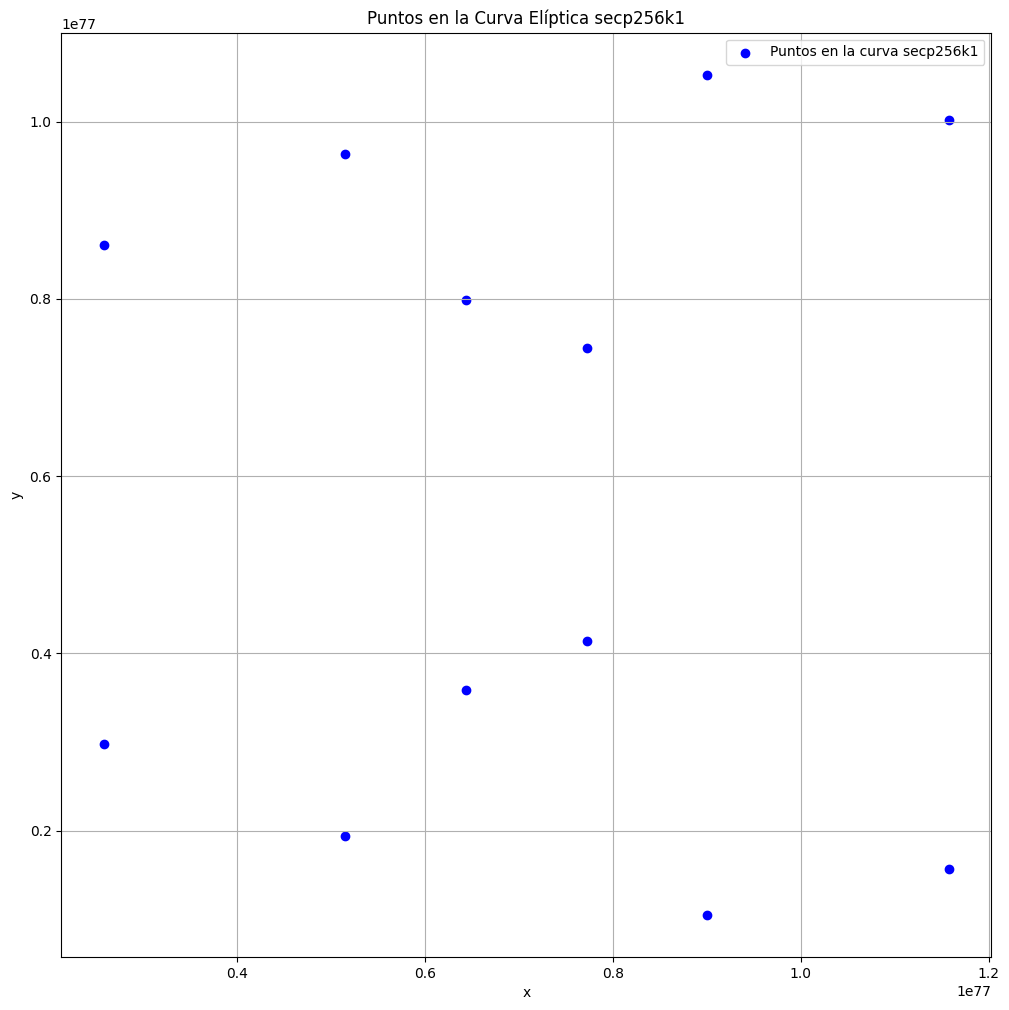

In [33]:
import matplotlib.pyplot as plt
import ecdsa
import numpy as np

# Definir la curva secp256k1
curve = ecdsa.SECP256k1.curve
p = curve.p()
a = curve.a()
b = curve.b()

def is_on_curve(x, y):
    """Verificar si un punto está en la curva"""
    return (y**2 - (x**3 + a * x + b)) % p == 0

def mod_sqrt(a, p):
    """Encontrar la raíz cuadrada módulo p usando el algoritmo de Tonelli-Shanks"""
    # Caso especial para p ≡ 3 (mod 4)
    if p % 4 == 3:
        return pow(a, (p + 1) // 4, p)
    
    # Algoritmo general para raíces cuadradas
    s = 0
    q = p - 1
    while q % 2 == 0:
        s += 1
        q //= 2
    
    z = 2
    while pow(z, (p - 1) // 2, p) != p - 1:
        z += 1
    
    m = s
    c = pow(z, q, p)
    t = pow(a, q, p)
    r = pow(a, (q + 1) // 2, p)
    
    while t != 0 and t != 1:
        t2i = t
        i = 0
        for i in range(1, m):
            t2i = pow(t2i, 2, p)
            if t2i == 1:
                break
        b = pow(c, 1 << (m - i - 1), p)
        m = i
        c = pow(b, 2, p)
        t = (t * c) % p
        r = (r * b) % p
    
    return r

def generate_curve_points(num_points_per_side):
    """Generar puntos en la curva secp256k1"""
    x_points = []
    y_points = []
    
    # Rango de valores x para la generación de puntos
    x_values = np.linspace(0, p, num=num_points_per_side)
    
    for x in x_values:
        # Calcular el valor de y usando la ecuación de la curva
        x = int(x)  # Convertir x a entero
        y_squared = (x**3 + a * x + b) % p
        
        # Encontrar la raíz cuadrada módulo p (esto puede implicar dos valores de y)
        try:
            y = mod_sqrt(y_squared, p)
            if is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
                
            y = p - y
            if y != mod_sqrt(y_squared, p) and is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
        except ValueError:
            continue

    return x_points, y_points

# Número de puntos a graficar
num_points_per_side = 10

# Obtener puntos en la curva
x_points, y_points = generate_curve_points(num_points_per_side)

# Configurar la gráfica
plt.figure(figsize=(12, 12))
plt.scatter(x_points, y_points, c='blue', marker='o', label='Puntos en la curva secp256k1')
plt.title('Puntos en la Curva Elíptica secp256k1')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


<h1>Gráfica secp112r1<h1/>

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los parámetros de la curva secp112r1
p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFDFFFFFFFFFFFFFFFFFFFFFFFC
a = 0x1
b = 0x0
Gx = 0x6D1D6C4D6C8BFE6BEE5F3C50E9B68F38DDAF0B1
Gy = 0x22918C6F4F1EED9CE2E2D90A7BCE6B00B5A0C1B
order = 0xDB7C2DCE8E8F3F3B5A8F6F85E4E65B7C0C1D8F2

def is_on_curve(x, y):
    """Verificar si un punto está en la curva"""
    return (y**2 - (x**3 + a * x + b)) % p == 0

def mod_sqrt(a, p):
    """Encontrar la raíz cuadrada módulo p usando el algoritmo de Tonelli-Shanks"""
    if p % 4 == 3:
        return pow(a, (p + 1) // 4, p)
    
    s = 0
    q = p - 1
    while q % 2 == 0:
        s += 1
        q //= 2
    
    z = 2
    while pow(z, (p - 1) // 2, p) != p - 1:
        z += 1
    
    m = s
    c = pow(z, q, p)
    t = pow(a, q, p)
    r = pow(a, (q + 1) // 2, p)
    
    while t != 0 and t != 1:
        t2i = t
        i = 0
        for i in range(1, m):
            t2i = pow(t2i, 2, p)
            if t2i == 1:
                break
        b = pow(c, 1 << (m - i - 1), p)
        m = i
        c = pow(b, 2, p)
        t = (t * c) % p
        r = (r * b) % p
    
    return r

def generate_curve_points(num_points_per_side):
    """Generar puntos en la curva secp112r1"""
    x_points = []
    y_points = []
    
    # Rango de valores x para la generación de puntos
    x_values = np.linspace(0, p, num=num_points_per_side)
    
    for x in x_values:
        x = int(x)  # Convertir x a entero
        y_squared = (x**3 + a * x + b) % p
        
        try:
            y = mod_sqrt(y_squared, p)
            if is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
                
            y = p - y
            if y != mod_sqrt(y_squared, p) and is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
        except ValueError:
            continue

    return x_points, y_points

# Número de puntos a graficar
num_points_per_side = 5

# Obtener puntos en la curva
x_points, y_points = generate_curve_points(num_points_per_side)

# Configurar la gráfica
plt.figure(figsize=(12, 12))
plt.scatter(x_points, y_points, c='blue', marker='o', label='Puntos en la curva secp112r1')
plt.title('Puntos en la Curva Elíptica secp112r1')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

<h1>Gráfica secp112r2<h1/>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros de la curva secp112r2
p = 0xDB7C2DCE8E8F3A0E1C8D2ECF5B0A0E6E0C5C5C3
a = 0x6127C24C9FBE0EBB4A6D10D4B82D4D1F0E6D4D1
b = 0x51DE8D1A5EB4F8A14C9A1B4D4F3B2BCE6D87A7C

def is_on_curve(x, y):
    """Verificar si un punto está en la curva"""
    return (y**2 - (x**3 + a * x + b)) % p == 0

def mod_sqrt(a, p):
    """Encontrar la raíz cuadrada módulo p usando el algoritmo de Tonelli-Shanks"""
    if p % 4 == 3:
        return pow(a, (p + 1) // 4, p)
    
    s = 0
    q = p - 1
    while q % 2 == 0:
        s += 1
        q //= 2
    
    z = 2
    while pow(z, (p - 1) // 2, p) != p - 1:
        z += 1
    
    m = s
    c = pow(z, q, p)
    t = pow(a, q, p)
    r = pow(a, (q + 1) // 2, p)
    
    while t != 0 and t != 1:
        t2i = t
        i = 0
        for i in range(1, m):
            t2i = pow(t2i, 2, p)
            if t2i == 1:
                break
        b = pow(c, 1 << (m - i - 1), p)
        m = i
        c = pow(b, 2, p)
        t = (t * c) % p
        r = (r * b) % p
    
    return r

def generate_curve_points():
    """Generar puntos en la curva secp112r2 sin limitar el rango de x"""
    x_points = []
    y_points = []
    
    # Probar un rango más amplio para x
    for x in range(0, p):
        y_squared = (x**3 + a * x + b) % p
        
        try:
            y = mod_sqrt(y_squared, p)
            if is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
                
            y = p - y
            if y != mod_sqrt(y_squared, p) and is_on_curve(x, y):
                x_points.append(x)
                y_points.append(y)
        except ValueError:
            continue
    
    return x_points, y_points

def closest_points(x_points, y_points, num_points=10):
    """Encontrar los puntos más cercanos al eje y"""
    # Crear una lista de puntos con sus distancias al eje y
    distances = [(x, y, abs(y)) for x, y in zip(x_points, y_points)]
    # Ordenar por la distancia al eje y
    sorted_points = sorted(distances, key=lambda p: p[2])
    # Seleccionar los puntos más cercanos
    closest_points = sorted_points[:num_points]
    
    x_closest, y_closest = zip(*[(p[0], p[1]) for p in closest_points])
    return x_closest, y_closest

# Generar puntos en la curva
x_points, y_points = generate_curve_points()

# Obtener los 10 puntos más cercanos al eje y
x_closest, y_closest = closest_points(x_points, y_points, num_points=10)

# Configurar la gráfica
plt.figure(figsize=(14, 10))
plt.scatter(x_closest, y_closest, c='blue', marker='o', s=10)
plt.title('10 Puntos Más Cercanos al Eje Y en la Curva Elíptica secp112r2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<h1>Gráfica secp128r1<h1/>